In [3]:
!pip install mlxtend --quiet

# Prática - Regressão Linear

*Aula criada por [André Guarnier De Mitri](https://t.me/andremitri)*

*Dados disponiveis no [GitHub](https://github.com/andregdmitri/DATA-aulas/tree/main)*

Agradecimentos ao [Alvaro Jose Lopes](https://github.com/AlvaroJoseLopes) pela aula original.

Esse material foi desenvolvido pelo **Data**, grupo de extensão de aprendizado e ciência de dados compostos por alunos do Instituto de Ciências Matemáticas e de Computação da USP.

Para saber mais sobre as atividades do Data entre no nosso site e nos siga e nossas redes sociais:
- [Site](http://data.icmc.usp.br/)
- [Twitter](https://twitter.com/data_icmc)
- [LinkedIn](https://www.linkedin.com/school/data-icmc/)
- [Facebook](https://www.facebook.com/dataICMC/)

Caso queira tirar dúvidas sobre os exercícios desse notebook em específico pode me chamar no [Telegram](https://t.me/andremitri) :)


O objetivo dessa tarefa é fazer com que vocês coloquem em prática a teoria que viram em aula e utilizem as bibliotecas padrão para realizar o exercício, então é completamente normal ficar travado ou com dúvidas :)

Peço desculpas por não fazer um exemplo com muitos detalhes, mas creio que aqui tem o suficiente para vocês treinarem o básico e conseguirem ter uma base para partirem para exemplos mais complexos e explorando mais os dados/modelo

### Processamento dos dados

Nessa tarefa iremos treinar um modelo responsável por realizar a previsão do preço de casas.

Primeiramente vamos importar algumas bibliotecas úteis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [5]:
URL = 'https://raw.githubusercontent.com/andregdmitri/DATA-aulas/main/dados/train_house_prices.csv'
houses_data = pd.read_csv(URL)
houses_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# O que é Regressão Linear?
É uma ferramenta estatística que utiliza a relação entre duas ou mais variáveis quantitativas de modo que uma possa ser predita por outra ou outras. Por exemplo, se é conhecida e a relação entre gasto com propagandas e vendas, é possível prever as vendas por analise de regressão uma vez que for definido o quanto foi gasto com propaganda.

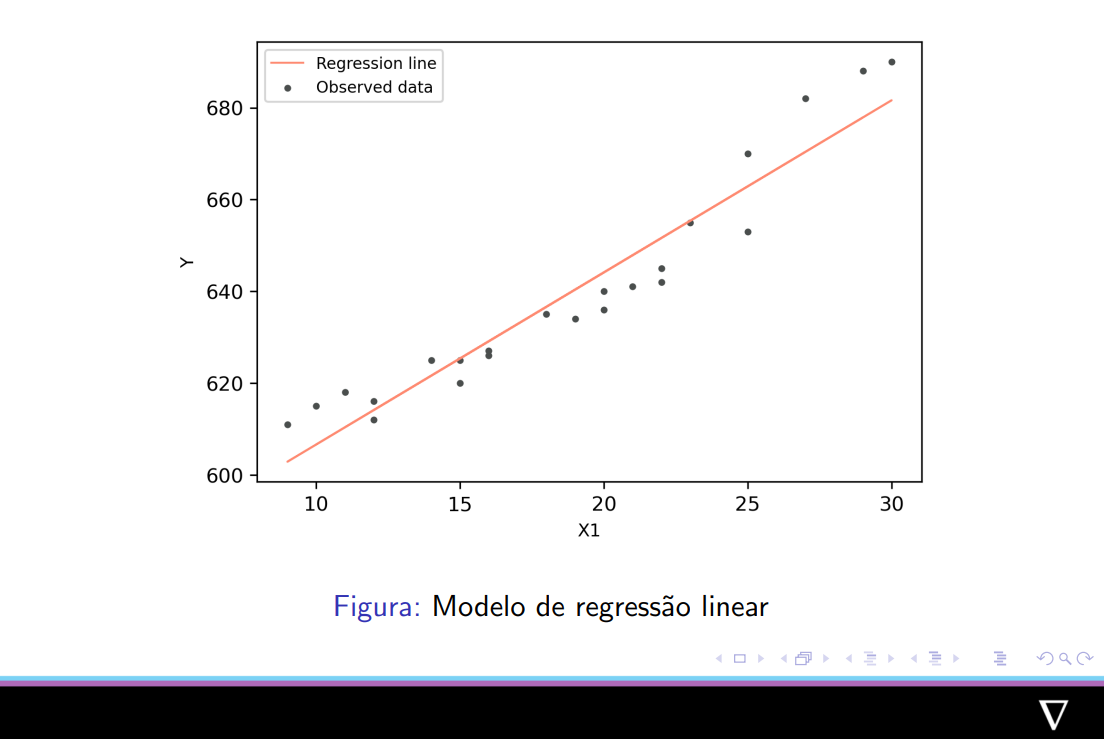

## Para o caso mais simples


$
\hat{Y}_i = b_0 + \beta_1 \cdot X_i + \epsilon
$

Sendos os parâmetros estimados:\
$
\beta_{0}=\overline{Y}-\beta_{1}\overline{X}\
$

$
\beta_{1}=\frac{S_{XY}}{S_{XX}}=\frac{\sum_{i=1}^{n}(X_{i}-\overline{X})(Y_{i}-\overline{Y})}{\sum_{i=1}^{n}(X_{i}-\overline{X})^{2}}.
$


### Notação
- $Y_i$: Obersvação i do Y REAL do problema.
- $\hat Y_i$: Obersvação i do Y ESTIMADO do problema.
- $\overline X$: Média dos valores de X
- $\overline Y$: Média dos valores de Y
- $S_{XY}$: Covâriancia entre de X e Y.
- $\epsilon$: Erro de ajuste

Vamos utilizar somente os dados de Area Income para aquecer


In [6]:
houses_data.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
# Escolhendo a variavel alvo e a variavavel preditora
X = np.array(houses_data[['Avg. Area Income']])
y = np.array(houses_data['Price'])

### Fazendo a regressão Manualmente

In [8]:
# Função que calcula a covâriancia entre X e Y
def Sxy(x,y):
  sum = 0
  for i in range(x.size):
    sum = sum + (x[i] - x.mean())*(y[i]-y.mean())
  return sum/len(x)

Lembrando:

$
\hat{Y}_i = b_0 + b_1 \cdot X_i + \epsilon \\
b_{0}=\overline{Y}-b_{1}\bar{X}\\
b_{1}=\frac{S_{XY}}{S_{XX}}=\frac{\sum_{i=1}^{n}(X_{i}-\bar{X})(Y_{i}-\bar{Y})}{\sum_{i=1}^{n}(X_{i}-\bar{X})^{2}}.
$

In [9]:
# Calculando b1
b1 = Sxy(X,y)/Sxy(X,X)
print(f'Parametro b1 estimado:    {b1[0]:.3f}')

# Calculando b0
b0 = y.mean() - b1*X.mean()
print(f'Parametro b0 estimado:    {b0[0]:.3f}')

# Reta obtida
print()
print(f'Logo, a equação estimada obtida é\n Yi = {b0[0]:.3f} + {b1[0]:.3f} * Xi')

# Tres primeiros valores preditos
Y_hat = b0 + b1*X
print(f'\nTrês primeiros Yi da Reta estimada obtida:')
for i in range(3):
  print(round(Y_hat[i][0], 3))

Parametro b1 estimado:    21.195
Parametro b0 estimado:    -221579.478

Logo, a equação estimada obtida é
 Yi = -221579.478 + 21.195 * Xi

Três primeiros Yi da Reta estimada obtida:
1464424.95
1458133.789
1077429.523


### Usando o SKlearn para fazer a regressão

In [10]:
from sklearn.linear_model import LinearRegression

# Predizendo a reta estimada com sklearn
reg = LinearRegression().fit(X,y)
Y_hat = reg.predict(X)

# b1 predito
b1 = reg.coef_[0]
print(f'Parametro b1 estimado:    {b1:.3f}')

# b0 predito
b0 = reg.intercept_
print(f'Parametro b0 estimado:    {b0:.3f}')

# Reta obtida
print()
print(f'Logo, a equação estimada obtida é\n Yi = {b0:.3f} + {b1:.3f} * Xi')

# Tres primeiros valores preditos
print(f'\nTrês primeiros Yi da Reta estimada obtida:')
for i in range(3):
  print(round(Y_hat[i], 3))

Parametro b1 estimado:    21.195
Parametro b0 estimado:    -221579.478

Logo, a equação estimada obtida é
 Yi = -221579.478 + 21.195 * Xi

Três primeiros Yi da Reta estimada obtida:
1464424.95
1458133.789
1077429.523


### Visualizando a reta

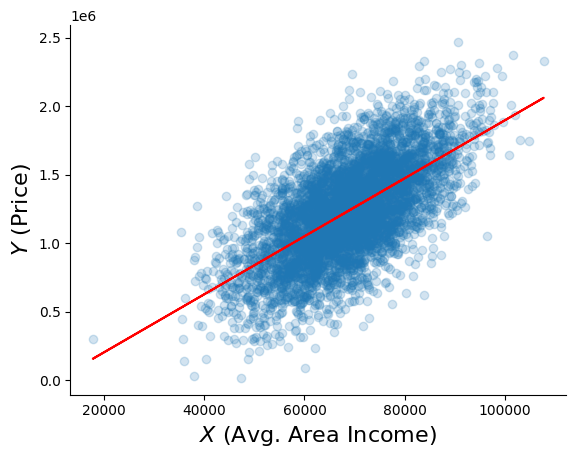

In [11]:
fig = plt.figure()
plt.plot(X,y,'o',color='C0',alpha=0.2,label=r'Dados')
plt.plot(X,Y_hat,'r-')
plt.xlabel(r'$X$ (Avg. Area Income)',fontsize=16)
plt.ylabel(r'$Y$ (Price)',fontsize=16)

for ax in fig.get_axes():
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
plt.show()

## Métricas de Avaliação

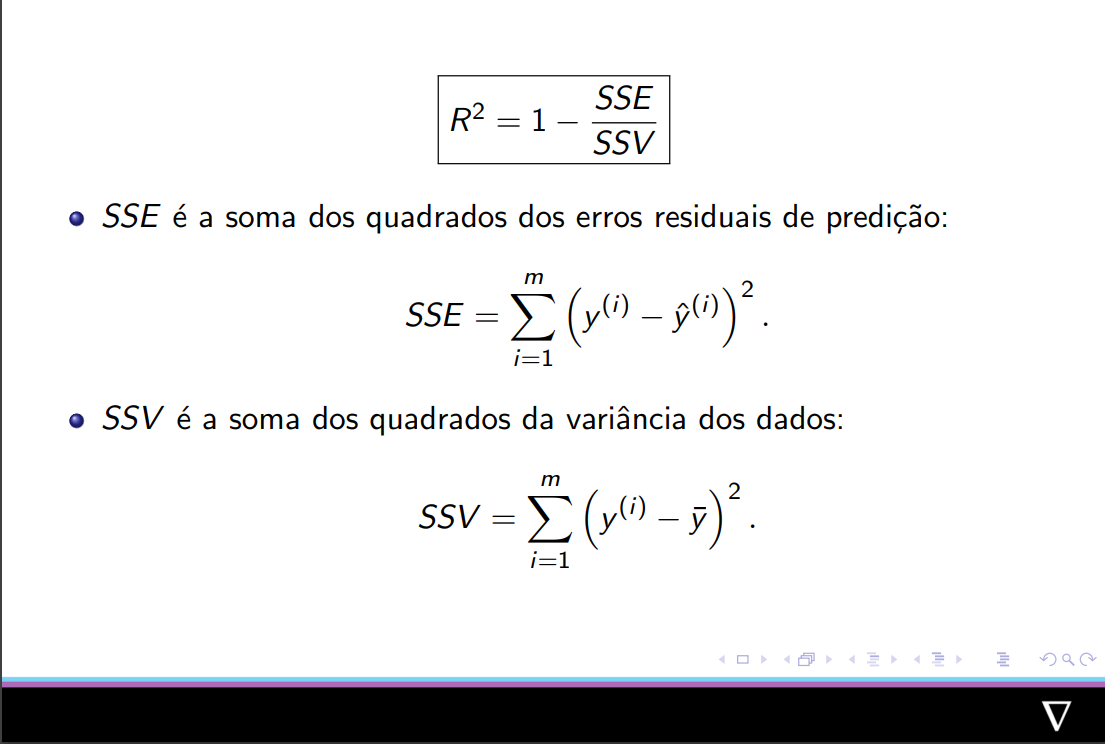

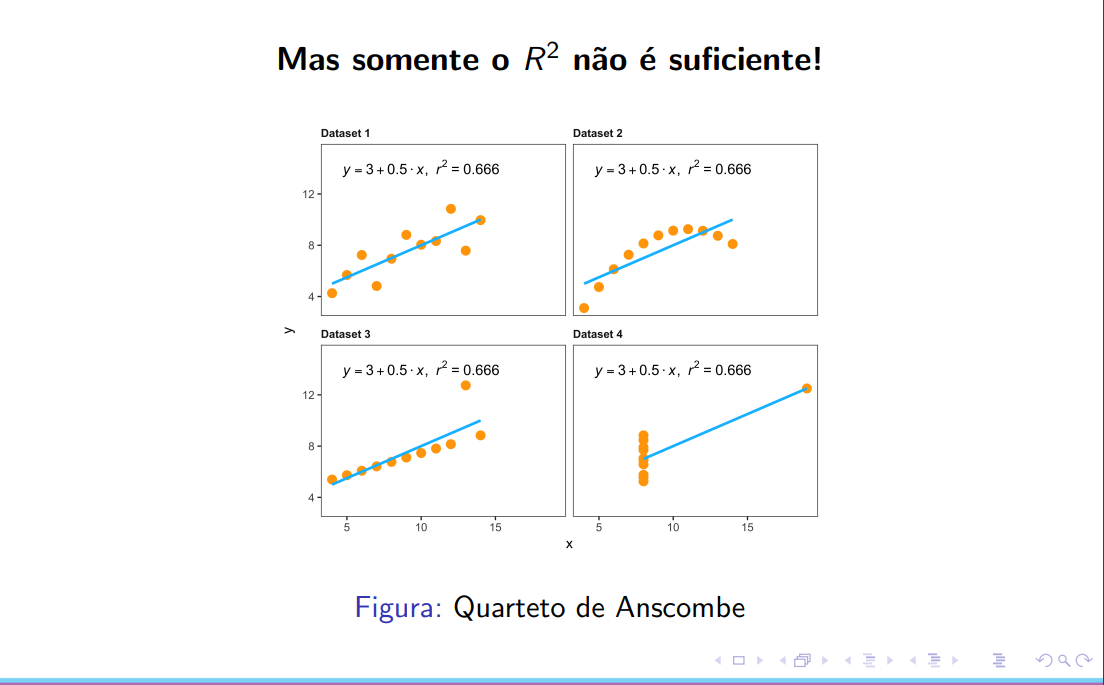

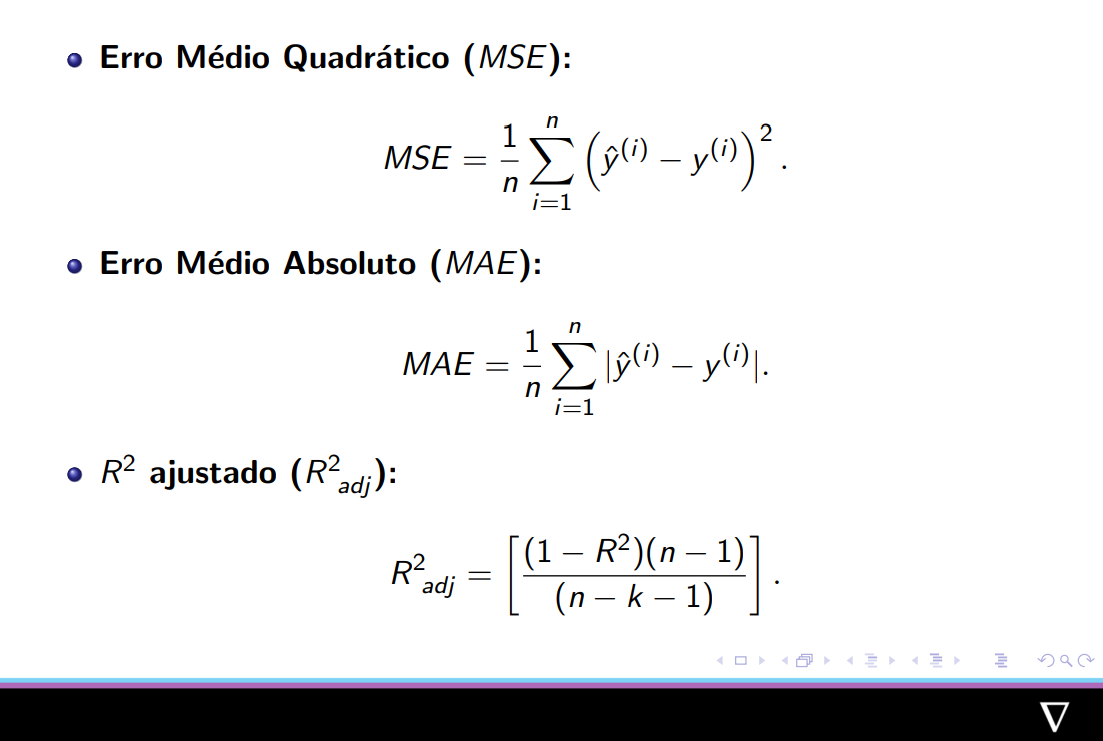

### Metricas obtidas

In [12]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    '''
      Função que calcula algumas das principais métricas para Regressão
        param:
            true:       valor real do y
            predicted:  valor do y obtido
    '''
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [13]:
print_evaluate(y,Y_hat)

MAE: 217320.48257130967
MSE: 73645940735.18942
RMSE: 271377.8560147998
R2 Square 0.4092593070338846
__________________________________


# Regressão com multiplas variaveis

Matrizes relevantes:

$$\mathbf{Y}=\left[\begin{array}{c}
Y_{1}\\
Y_{2}\\
\vdots\\
Y_{n}
\end{array}\right] \mbox{(respostas)}, \; \mathbf{X}=\left[\begin{array}{ccccc}
1 & X_{11} & X_{12} & \cdots & X_{1,p-1}\\
1 & X_{21} & X_{22} & \cdots & X_{2,p-1}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
1 & X_{n1} & X_{n2} & \cdots & X_{n,p-1}
\end{array}\right] \mbox{(dados das covariaveis)}$$


$$ \boldsymbol{\beta}=\left[\begin{array}{c}
\beta_{0}\\
\beta_{1}\\
\vdots\\
\beta_{n}
\end{array}\right] \mbox{(coeficientes)},\;\boldsymbol{\varepsilon}=\left[\begin{array}{c}
\varepsilon_{1}\\
\varepsilon_{2}\\
\vdots\\
\varepsilon_{n}
\end{array}\right]  \mbox{(erros)}. $$


Estimadores por mínimos quadrados

$ \boldsymbol{\hat{\beta}} = (\mathbf{X}^{T}\mathbf{X})^{-1} \mathbf{X}^{T} \mathbf{Y}  $


$
\hat{Y}_i = \beta_0 + \beta_1 \cdot X_{n,1} + \beta_2 \cdot X_{n,2} + \cdots + \beta_p X_{n,p-1}\\
$


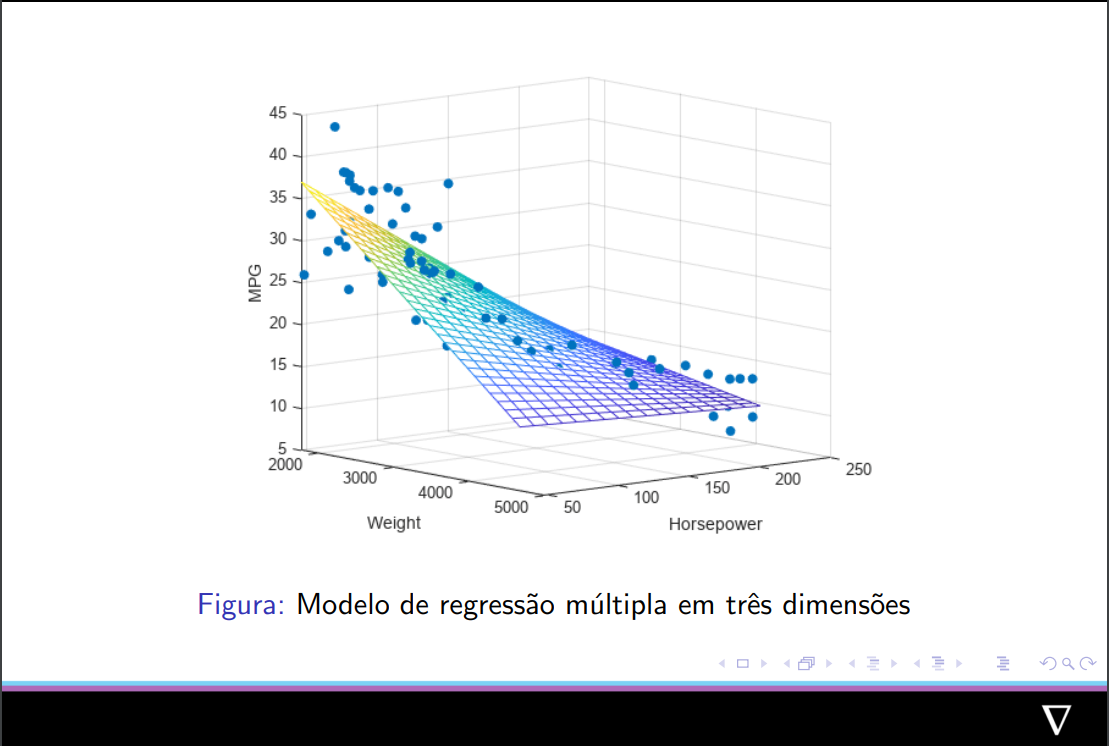

In [14]:
houses_data.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


## Definindo os dados

In [15]:
# Definindo X e Y
X = (houses_data.drop(columns=['Address', 'Price']))
y = np.array(houses_data['Price'])

## Usando o SKlearn

In [16]:
from sklearn.linear_model import LinearRegression

# Predizendo a reta estimada com sklearn
reg = LinearRegression().fit(X,y)
Y_hat = reg.predict(X)

# b0 predito
b0 = reg.intercept_
print(f'Parametro b0 (intercepto) estimado:    {b0:.3f}')

# b1 predito
b1 = reg.coef_
print(f'Parametros b`s estimados:\n{b1}')

# Reta obtida
b_values = [f"{b1[i]:.3f} * X{i+1}" for i in range(5)] # Adquirindo a String os b's
print()
print(f"Logo, o Y  estimado obtido é\nYi = {b0:.3f} + {' + '.join(b_values)}")

Parametro b0 (intercepto) estimado:    -2637299.033
Parametros b`s estimados:
[2.15780494e+01 1.65637027e+05 1.20659949e+05 1.65113905e+03
 1.52007439e+01]

Logo, o Y  estimado obtido é
Yi = -2637299.033 + 21.578 * X1 + 165637.027 * X2 + 120659.949 * X3 + 1651.139 * X4 + 15.201 * X5


### Metricas obtidas

In [17]:
print_evaluate(y,Y_hat)

MAE: 81359.27022837057
MSE: 10219734313.253004
RMSE: 101092.70158252279
R2 Square 0.9180238195089553
__________________________________


# Refazendo nossa análise com boas práticas

## Data Split

In [18]:
from sklearn.model_selection import train_test_split
seed = 42
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=seed)

## Pipeline: normalização e modelo desejado

O próximo passo é montar um pipeline para nossa regressão (transformações para preparar os dados e a regressão em si). Usaremos a classe [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) do SkLearn. Usar o Pipeline é uma boa prática para previnir [*data leakage*](https://scikit-learn.org/stable/common_pitfalls.html#:~:text=The%20scikit%2Dlearn%20pipeline%20is,and%20hyper%2Dparameter%20tuning%20functions.).

Construa um pipeline contendo a padronização dos dados (utilizando `StandardScaler`), seguido da Regressão Linear.

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipe = Pipeline([
    ('std_scalar', StandardScaler()),
    ('linear_regression', LinearRegression())
])

## Treinando o Modelo

In [20]:
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val)

0.9179971706834331

## Verificando as métricas

In [21]:
y_pred = pipe.predict(X_val)
print('Avaliação do conjunto de validação\n_____________________________________')
print_evaluate(y_val, y_pred)

Avaliação do conjunto de validação
_____________________________________
MAE: 80879.09723489445
MSE: 10089009300.89399
RMSE: 100444.06055558482
R2 Square 0.9179971706834331
__________________________________


## Plotando os Y's reais e preditos

Note não é possível mostrar os resultados da predição em função das features do problema, uma vez que não conseguiríamos plotar em mais de 3 dimensões. Nesse caso, uma maneira de visualizar a precisão na predição é plotar os valores preditos vs reais.

Para isso use os dados de validação.

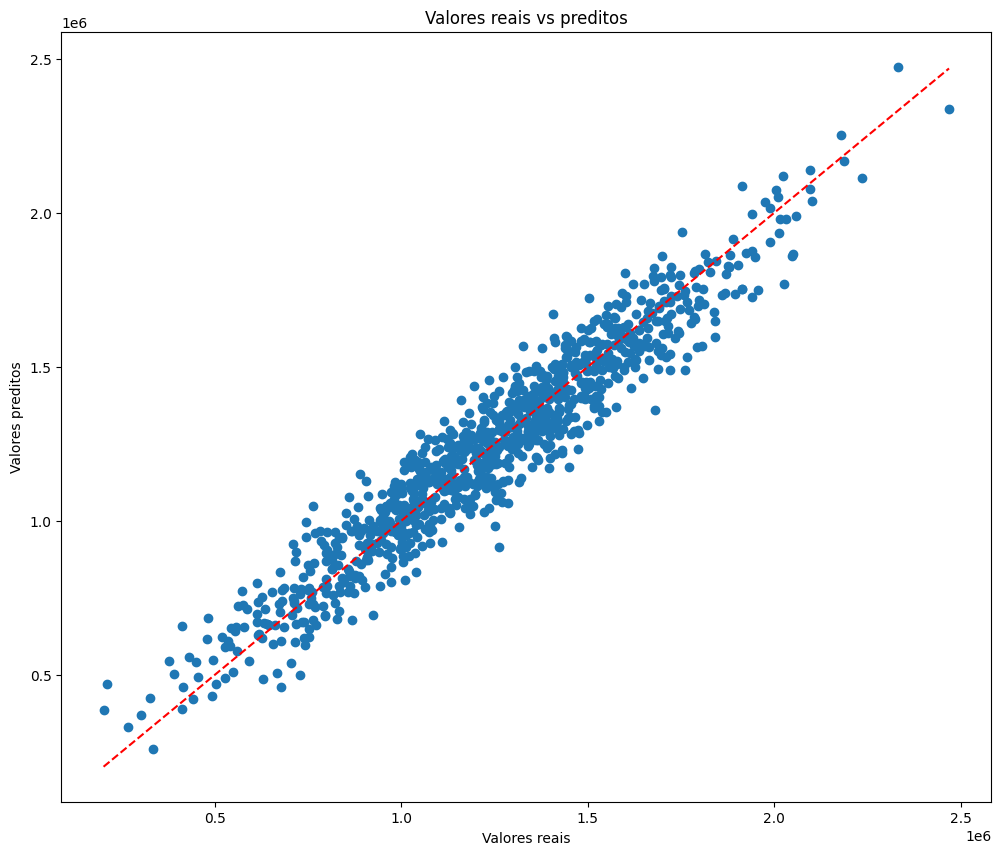

In [22]:
plt.figure(figsize=(12,10))
plt.scatter(y_val, y_pred)

# Plotando a reta do melhor cenario
xl = np.arange(min(y_val), 1.05*max(y_val),(max(y_val)-min(y_val))/10)
yl = xl

plt.plot(xl, yl, 'r--')
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
plt.title('Valores reais vs preditos')
plt.show()

## Analisando a influencia dos coeficientes (cada b estimado da equação abaixo)

$$
\hat{Y}_i = \beta_0 + \beta_1 \cdot X_{n,1} + \beta_2 X_{n,2} + \cdots + \beta_n X_{n,p-1}\\
$$

<Axes: >

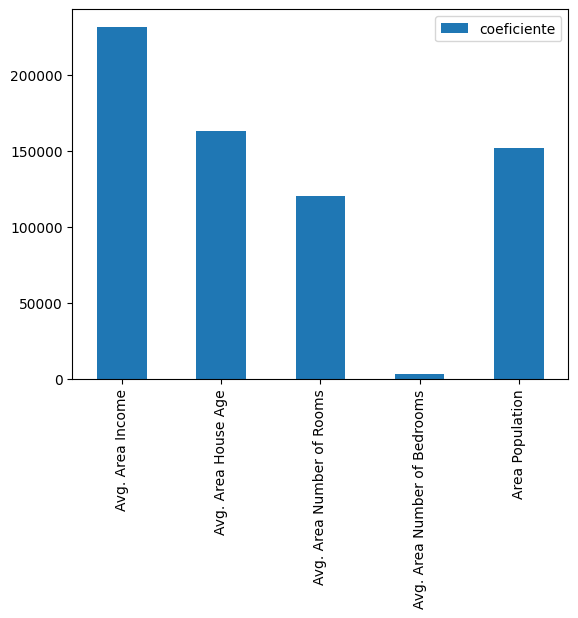

In [23]:
features_coef = {}
coefs = pipe['linear_regression'].coef_
for idx, column in enumerate(X_train.columns):
    features_coef[column] = coefs[idx]

for key in features_coef.keys():
    features_coef[key] = [features_coef[key]]
df_coefs = pd.DataFrame.from_dict(features_coef, orient='index', columns=['coeficiente'])
df_coefs.plot.bar()

Para entendermos melhor a importância de cada feature, vamos olhar os coeficientes associados a cada feature.

Construa um dicionário do tipo `{nome_coluna: valor_coeficiente}`

Agora munido dos coeficientes, qual feature possui um maior impacto no preço?

Considere o impacto dessa feature como o incremento no preço causado pelo aumento unitário de uma determinada feature, mantendo as demais constantes.

Caso vocês desejem dar uma olhada em um exemplo mais completo recomendo dar uma olhada nesse notebook [aqui](https://www.kaggle.com/faressayah/linear-regression-house-price-prediction/notebook)

## Usando p-valor e o statsmodel

In [24]:
df_temp = pd.DataFrame.copy(houses_data)
#df_temp = df_temp.drop(columns=['Avg. Area Number of Bedrooms'])
novos_nomes = {'Avg. Area Income': 'x1', 'Avg. Area House Age': 'x2', 'Avg. Area Number of Rooms':'x3', 'Avg. Area Number of Bedrooms':'x4', 'Area Population':'x5'}
df_temp = df_temp.rename(columns=novos_nomes)
df_temp.head(2)

,x1,x2,x3,x4,x5,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

model = smf.ols(formula='y ~ x1 + x2 + x3 + x4 + x5', data=df_temp)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Sun, 27 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:49:13   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.637e+06   1.72e+04   -153.708      0.0

Para mais detalhes da análise consulte essa [pagina](https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/)

# Exercicio
Tente repetir os experimentos feitos acima, mas usando menos features, e vericando se houve alteração no score.

In [37]:
# Escolha apenas algumas das features e verifique como as métricas de avaliação são afetadas
# X = np.array(houses_data[['', '']])
# y = np.array(houses_data['Price'])


houses_data.set_index('Price', inplace=True)
newX = pd.DataFrame(houses_data.drop(columns=['Avg. Area Number of Bedrooms', 'Address']))
newY = pd.DataFrame(houses_data.index)
print(houses_data.columns)
print(houses_data.index)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Address'],
      dtype='object')
Index([1059033.5578701235,   1505890.91484695, 1058987.9878760849,
       1260616.8066294468,  630943.4893385402, 1068138.0743935304,
       1502055.8173744078, 1573936.5644777217,  798869.5328331633,
       1545154.8126419624,
       ...
        479500.5568108269,  1263720.517856778, 1568700.5855257383,
        1381830.779029103,  905354.9139602784,  1060193.785884608,
        1482617.728622024, 1030729.5831522896, 1198656.8724076871,
       1298950.4802669554],
      dtype='float64', name='Price', length=5000)


## Data Split

In [38]:
from sklearn.model_selection import train_test_split
seed = 42

Xtrain, Xtest, Ytrain, Ytest = train_test_split(newX , newY , test_size=0.2,random_state=seed)

'''
PREENCHA AQUI:
    - Utilize a função train_test_split para separar os dados em dados
    de treino e de validação (80% treino e 20% validação)
    - Passe o parametro random_state=seed definida para facilitar a
    reprodução dos experimentos.
'''

'\nPREENCHA AQUI:\n    - Utilize a função train_test_split para separar os dados em dados\n    de treino e de validação (80% treino e 20% validação)\n    - Passe o parametro random_state=seed definida para facilitar a\n    reprodução dos experimentos.\n'

In [28]:
# @title Resposta

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=seed)

## Pipeline

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

newPipe = Pipeline([
    ('StandardScaler', StandardScaler() ),
    ('LinearRegression', LinearRegression() )
])




In [30]:
# @title Resposta:

# pipe = Pipeline([
#     ('std_scalar', StandardScaler()),
#     ('linear_regression', LinearRegression())
# ])

## Treinamento

In [40]:



'''
PREENCHA AQUI:
    Utilizando o Pipeline instanciado no passo anterior:
    - Faça o fitting utilizando o método fit() nos dados de treino
    - Avalie o desempenho do modelo utilizando o método score()
    nos dados de validação. Consulte na documentação qual métrica o score()
    utiliza.
'''

newPipe.fit(Xtrain, Ytrain)

score = newPipe.score(Xtest,Ytest)

print(score)

0.9181214278738103


In [32]:
# @title Resposta:


# pipe.fit(X_train, y_train)
# pipe.score(X_val, y_val)

# O Score utilizado é o R2

## Validação

In [41]:
y_predicted = newPipe.predict(Xtest)
print_evaluate(Ytest, y_predicted)



'''
PREENCHA AQUI:
    - Utilizando o modelo fittado, faça a predição dos preços das casas no
    no conjunto de validação.
    - Utilize a função print_evaluate para consultar as demais métricas.
    Passe como argumento os valores reais e o predito no passo anterior.
'''

MAE: 80857.7894404619
MSE: 10073721633.872412
RMSE: 100367.93130214656
R2 Square 0.9181214278738103
__________________________________


'\nPREENCHA AQUI:\n    - Utilizando o modelo fittado, faça a predição dos preços das casas no\n    no conjunto de validação.\n    - Utilize a função print_evaluate para consultar as demais métricas.\n    Passe como argumento os valores reais e o predito no passo anterior.\n'

In [ ]:
# @title Resposta

# y_pred = pipe.predict(X_val)
# print('Avaliação do conjunto de validação\n_____________________________________')
# print_evaluate(y_val, y_pred)

## Plot valores preditos vs Reais

C:\Users\Caue Paiva\AppData\Local\Temp\ipykernel_11876\4145026687.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Ytest, y_predicted, c='blue', cmap='viridis')


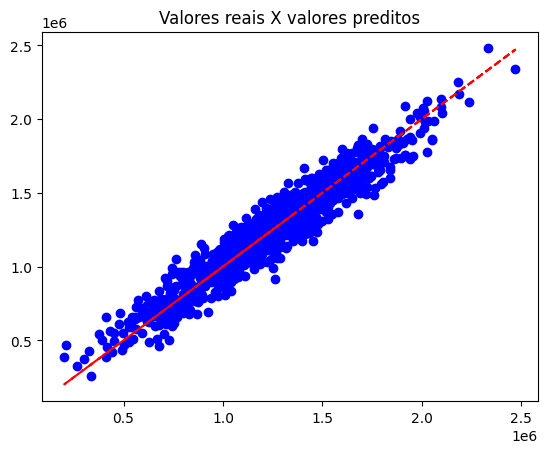

'\nPREENCHA AQUI:\n    - Utilize a predição nos dados de validação para fazer um scatterplot\n    dos valores reais vs preditos. Para isso, utilize a função plt.scatter() do\n    matplotlib com o valor de Y real e o valor de Y predito.\n    - Tente plotar a reta que representa o melhor cenário (y_pred == y_val).\n    - Lembre-se de adicionar um título e labels para as coordenadas com\n    plt.xlabel(), plt.ylabel() e plt.title(). Não se esqueça do plt.show() no fim ;)\n'

In [47]:
tolerance = 1e-9

colors = ['blue' if  np.any(np.abs(Ytest - y) < tolerance)  else 'red' for y in y_predicted]



plt.scatter(Ytest, y_predicted, c='blue', cmap='viridis')

plt.plot(Ytest, Ytest, 'r--')

plt.title('Valores reais X valores preditos') 


plt.show()

'''
PREENCHA AQUI:
    - Utilize a predição nos dados de validação para fazer um scatterplot
    dos valores reais vs preditos. Para isso, utilize a função plt.scatter() do
    matplotlib com o valor de Y real e o valor de Y predito.
    - Tente plotar a reta que representa o melhor cenário (y_pred == y_val).
    - Lembre-se de adicionar um título e labels para as coordenadas com
    plt.xlabel(), plt.ylabel() e plt.title(). Não se esqueça do plt.show() no fim ;)
'''

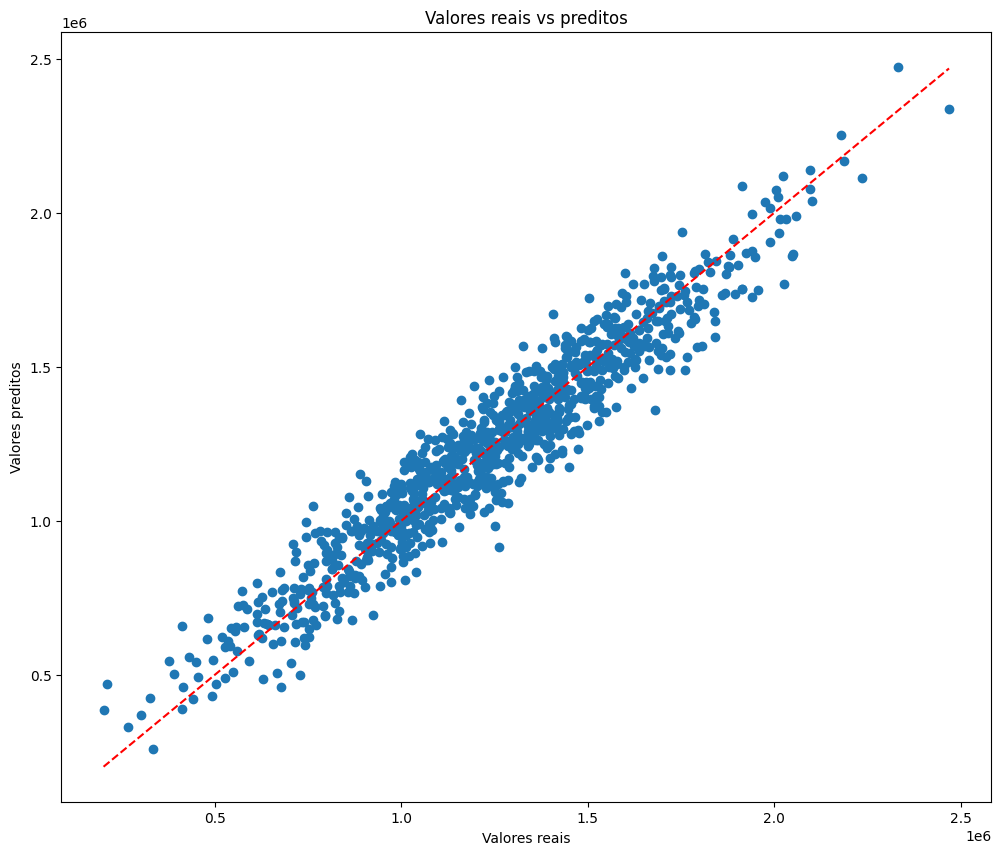

In [46]:
 #@title Resposta

plt.figure(figsize=(12,10))
plt.scatter(y_val, y_pred)

  #Plotando a reta do melhor cenario
xl = np.arange(min(y_val), 1.05*max(y_val),(max(y_val)-min(y_val))/10)
yl = xl

plt.plot(xl, yl, 'r--')
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
plt.title('Valores reais vs preditos')
plt.show()

# Regressão Logística

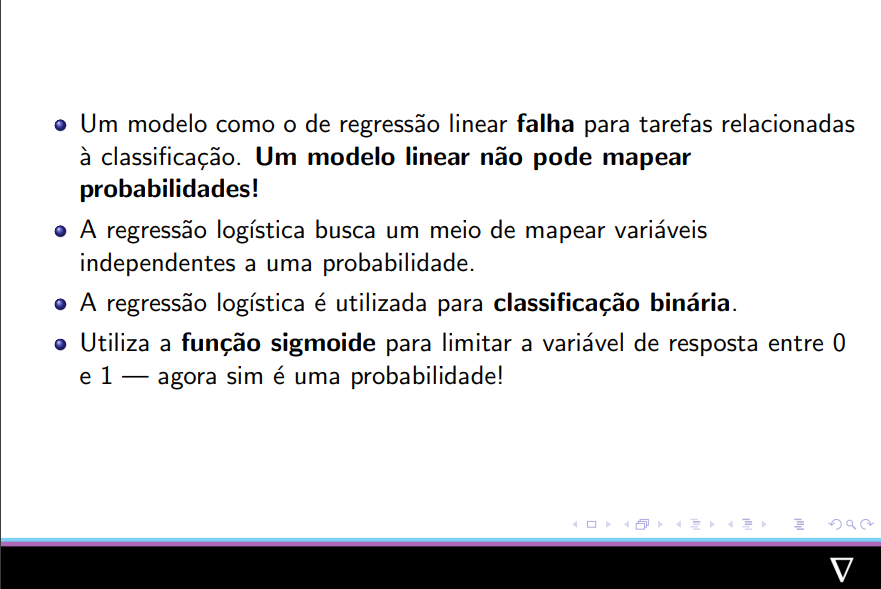

Nessa parte da tarefas estamos interessados em:
- Familiarizar o uso do modelo de Regressão Logística, a partir de dados artificiais e datasets reais.
- Visualização, para melhor entendimento, da função sigmoid usada para modelar a probabilidade.
- Visualização da região de separação para classificação binária e multiclasse.

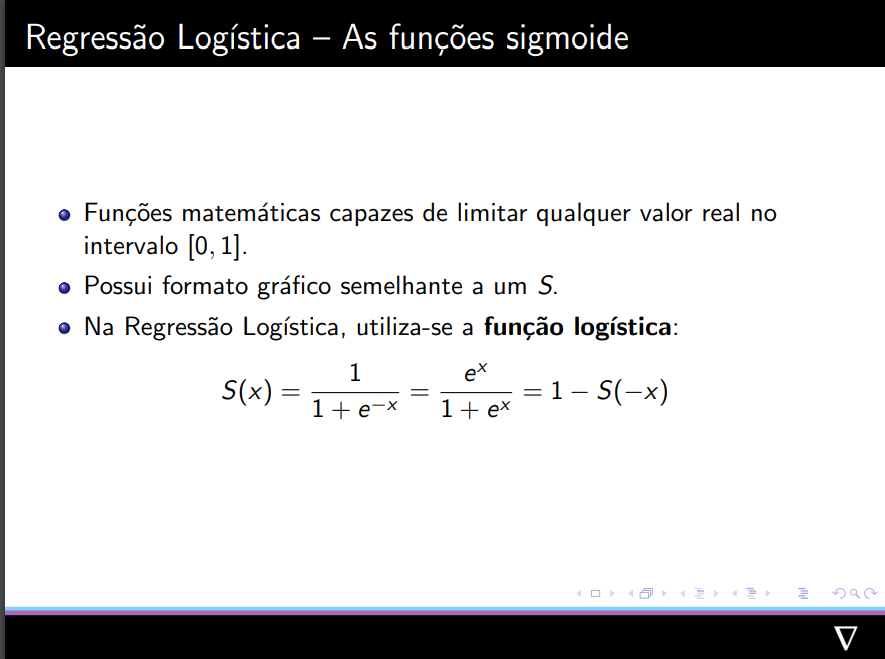

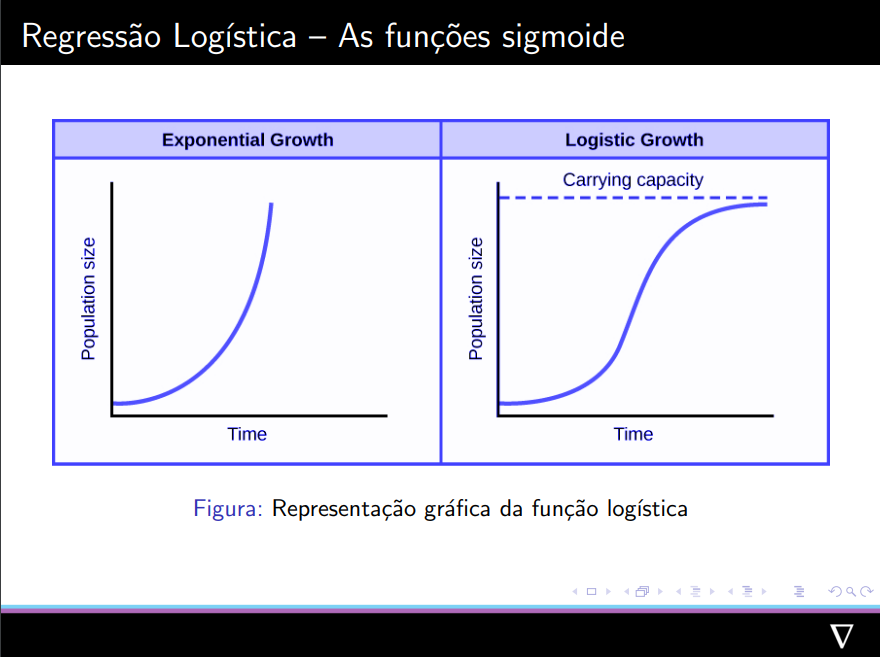

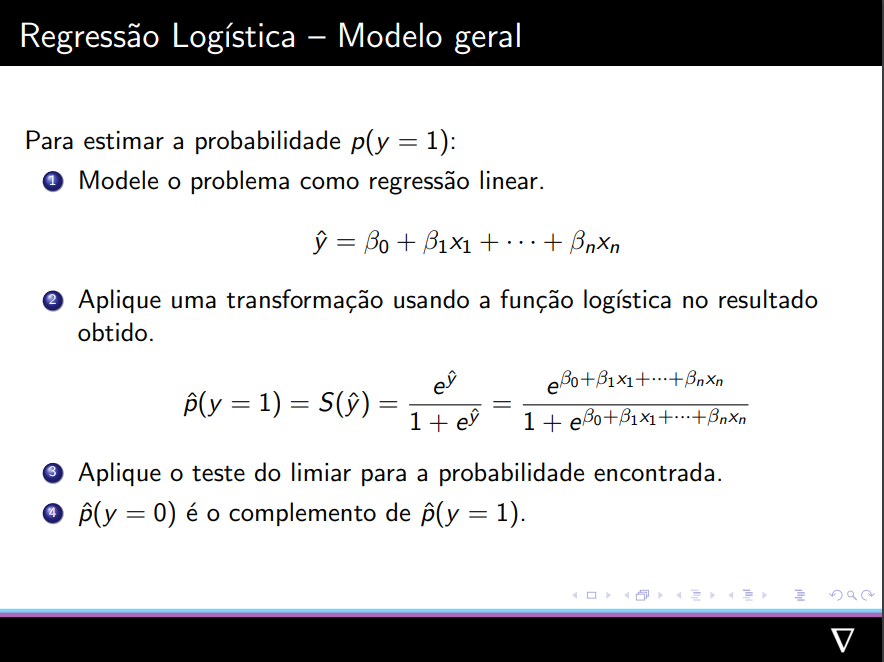

## Dataset Artificial

Inicialmente vamos usar um dataset artifical com apenas uma feature para melhor visualizar como a regressão logística funciona.



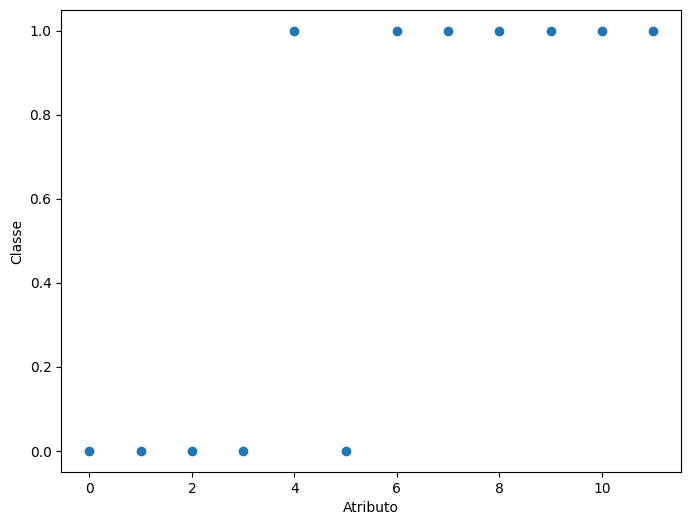

In [48]:
X = np.arange(12).reshape(-1, 1)
y = np.array([0, 0, 0, 0,1,0, 1, 1, 1, 1, 1, 1])

plt.figure(figsize=(8,6))
plt.scatter(X,y)
plt.xlabel('Atributo')
plt.ylabel('Classe')
plt.show()

### Instanciando o modelo e visualizando a Sigmoid

In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

A regressão logística utiliza a função sigmoid para modelar o resultado da regressão como um valor probabilístico (entre 0 e 1) e pode ser dada por:

$$\sigma(z) = \frac{1} {1 + e^{-z}}$$

em que $z$ será nossa regressão linear.

A partir dos coeficientes e intercepto retornados pelo modelo construa a regressão linear $z$ e implemente uma função para retornar o valor da sigmoid $\sigma(z)$

In [53]:
from math import exp #função para e^(x)

z = lambda x : model.coef_[0] * x + model.intercept_
sigma = lambda x: 1/(1+exp(-z(x)))

Agora basta aplicar a função sigmoid para obtermos a curva. Plot a curva junto com os dados e uma linha horizontal representando o limiar de decisão. Lembre que a região de decisão será onde $P(y=0 | x) = P(y=1 | x)$.

C:\Users\Caue Paiva\AppData\Local\Temp\ipykernel_11876\3150767706.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sigma = lambda x: 1/(1+exp(-z(x)))


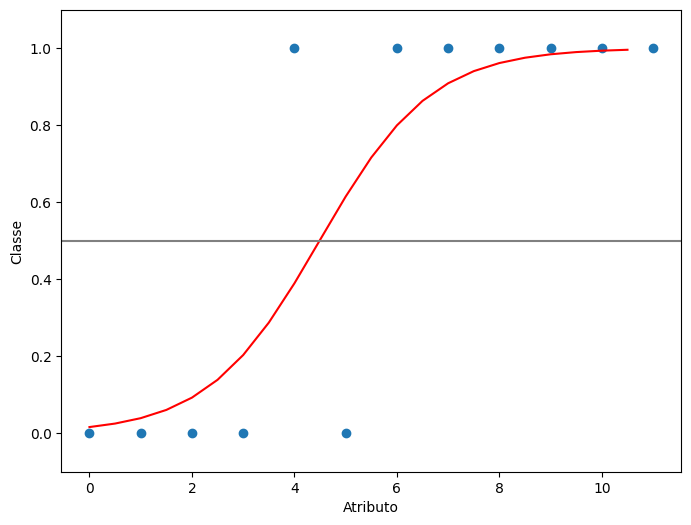

In [55]:
X_sigmoid = np.arange(np.min(X), np.max(X), 0.5).reshape(-1,1)
y_sigmoid = np.array(list(map(sigma, X_sigmoid)))

plt.figure(figsize=(8,6))
plt.scatter(X,y)
plt.xlabel('Atributo')
plt.ylabel('Classe')
plt.plot(X_sigmoid, y_sigmoid, color='red')
plt.axhline(.5, color='.5')
plt.ylim(-.1, 1.1)
plt.show()

### Identificando os erros

Agora, munidos da representação gráfica do modelo com a sigmoid podemos visualizar graficamente quais classes foram atribuídas para cada ponto.

**Exercício**: Utilizando a interpretação gráfica do modelo, identifique quais pontos foram classificados erroneamente.

**Sua Resposta**: Para analisar o gráfico precisamos estabelecer qual será o limiar de decisão. Nesse caso será a probabilidade de 0.5. Olhando a intersecção da reta horizontal que indica esse limiar, trace uma reta vertical. Os pontos à esquerda serão classificados como `0` e os à direita como `1`.

Dessa vez utilizando código identifique o índice dos pontos no vetor `X` que foram classificados erroneamente

In [56]:
wrongs = np.argwhere((model.predict(X) == y) == False)
wrongs

array([[4],
       [5]], dtype=int64)

Por fim, vamos consultar qual a probabilidade atribuida a cada uma das classes pelo nosso modelo e a sua acurácia média.

In [74]:
print('--'*20)
print('Utilizando a função sigmoid implementada:')
print('Probabilidades da classe 1')
#print(np.array(list(map(sigma, X))))
print()
print('Probabilidades da classe 2')
#print(1-np.array(list(map(sigma, X))))
print()
print('--'*20)
print('Utilizando o método predict_proba()')
#print(model.predict_proba(X))
probSigma1 =  np.array(list(map(sigma, X)))
probSigma2 =  1 - np.array(list(map(sigma,X)))
baseline =  model.predict_proba(X)



for i in X:
  larger_prob = max(probSigma1[i], probSigma2[i])
 # print("\n")
  print(larger_prob)
  base_value = max(baseline[i][0])
  print(base_value)

  diff = larger_prob - base_value
  if (diff != 0):
    print("diferença entre sigmoid e baseline")
  print(larger_prob - base_value)

 # print(f"difference between sigmoid and baseline {larger_prob - baseline[i]}")

    

----------------------------------------
Utilizando a função sigmoid implementada:
Probabilidades da classe 1

Probabilidades da classe 2

----------------------------------------
Utilizando o método predict_proba()
[0.98399334]
0.9839933443732964
[0.]
[0.9608913]
0.9608913008299975
[0.]
[0.90757831]
0.9075783138192046
[0.]
[0.79694682]
0.7969468226453424
[0.]
[0.61069199]
0.610691990518389
[0.]
[0.61464414]
0.6146441429676963
[0.]
[0.79962855]
0.7996285503825246
[0.]
[0.90896583]
0.9089658299711436
[0.]
[0.96151238]
0.9615123769797429
[0.]
[0.98425355]
0.9842535545008435
[0.]
[0.99364645]
0.993646445534062
[0.]
[0.99745091]
0.9974509066803166
[0.]


C:\Users\Caue Paiva\AppData\Local\Temp\ipykernel_11876\3150767706.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sigma = lambda x: 1/(1+exp(-z(x)))


Destaque os pontos não classificados corretamente no plot anterior. Para destacar vamos atribuir diferentes cores para cada ponto:
- Verde para os corretamente classificados;
- Vermelho para os incorretamente classificados.

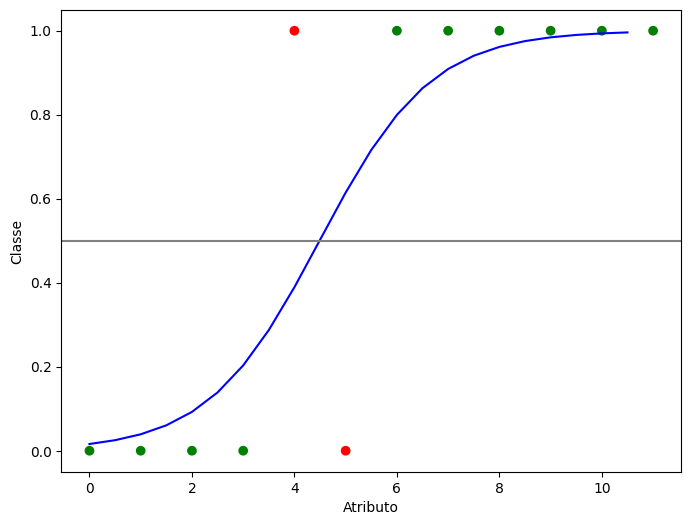

In [75]:
colors = ['green', 'red']
points_colors = [colors[idx in wrongs] for idx in range(len(X))]

plt.figure(figsize=(8,6))
plt.scatter(X,y, color=points_colors)
plt.xlabel('Atributo')
plt.ylabel('Classe')
plt.plot(X_sigmoid, y_sigmoid, color='blue')
plt.axhline(.5, color='.5')
plt.show()

### Visualizando a região de separação

Agora vamos explorar uma das propriedades que a regressão logística nos fornece:  a superfície de separação são hiperplanos (retas em duas dimensões, planos em 3 dimensões ou hiperplanos em 4 ou mais dimensões).

Para isso consulte a [documentação](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/#plot_decision_regions) da bibliotexa mlxtend.

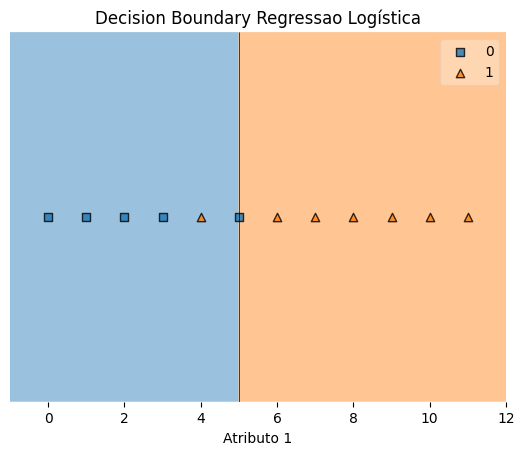

In [76]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X,y,clf=model)
plt.xlabel('Atributo 1')
plt.title('Decision Boundary Regressao Logística')
plt.show()

### Dataset Artificial

Vamos utilizar um novo dataset artificial, dessa vez com 2 features e 2 classes para que possamos visualizar a superfície de decisão para um problema com duas features.

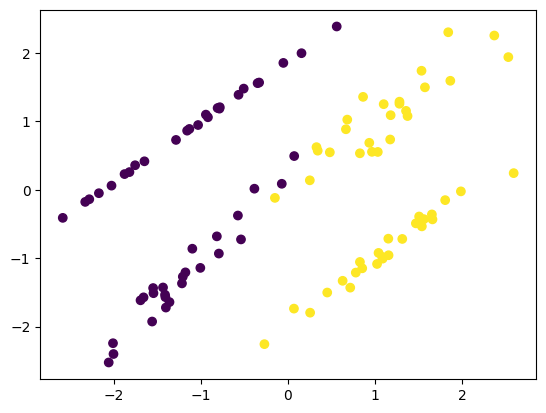

In [78]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=100, n_features=2, n_informative = 2, n_redundant=0,
    n_repeated=0, n_classes=2, random_state=42
)

plt.scatter(X[:, 0], X[:, 1], c=y)

### Treinando o modelo

Instancie um objeto da classe Logistic Regression e faça o fitting nos dados.

In [80]:
model = LogisticRegression()

model.fit(X,y)

print(model.score(X,y))

'''
PREENCHA AQUI:
    - Instancie um objeto da classe Logistic Regression;
    - Faça o fitting nos dados com método fit();
    - Consulte a acurácia do modelo com  método score().
'''

0.99


'\nPREENCHA AQUI:\n    - Instancie um objeto da classe Logistic Regression;\n    - Faça o fitting nos dados com método fit();\n    - Consulte a acurácia do modelo com  método score().\n'

In [ ]:
# @title Resposta
# clf = LogisticRegression()
# clf.fit(X,y)
# clf.score(X,y)

### Região de separação

Agora munido do modelo, plote a região de decisão desse dados.

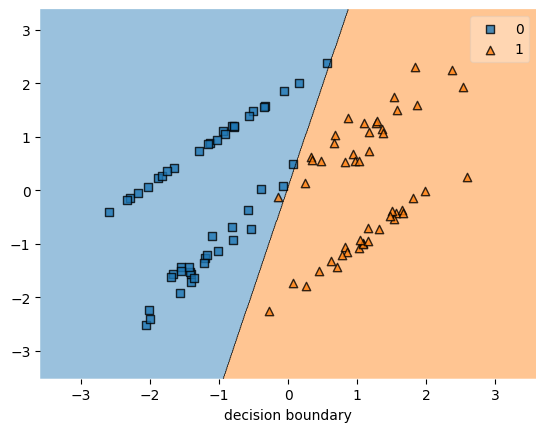

 
 x wrong labels
[[-0.15013844 -0.11708689]]
 
 Y wrong labels
[1]


'\nPREENCHA AQUI:\n    - Instancie um objeto da classe Logistic Regression;\n    - Faça o fitting nos dados;\n    - Consulte a acurácia do modelo.\n'

In [86]:
plot_decision_regions(X,y, clf=model)
plt.xlabel("decision boundary")
plt.show()

wrong_labels = np.where((model.predict(X) == y)== False)

print(" \n x wrong labels")
print(X[wrong_labels])

print(" \n Y wrong labels")
print(y[wrong_labels])



'''
PREENCHA AQUI:
    - Instancie um objeto da classe Logistic Regression;
    - Faça o fitting nos dados;
    - Consulte a acurácia do modelo.
'''

In [ ]:
# @title Reposta

# plot_decision_regions(X, y, clf=clf)
# plt.xlabel('Atributo 1')
# plt.ylabel('Atributo 2')
# plt.title('Decision Boundary Regressao Logística')
# plt.show()

## Iris Dataset

Vamos usar um dataset mais complexo (com 4 features e 3 classes). A descrição dele está apresentada abaixo.

Note que esse dataset possui 3 classes, então teremos de usar a Regressão Logística Multinomial, uma generalização para problemas com múltiplas classes.

In [87]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [109]:
data = np.c_[iris['data'], iris['target']]
df = pd.DataFrame(data=data, columns=iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [125]:
df.info()

X = df.drop(['target'], axis=1)

Y = df['target']

print(Y.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64


<Axes: >

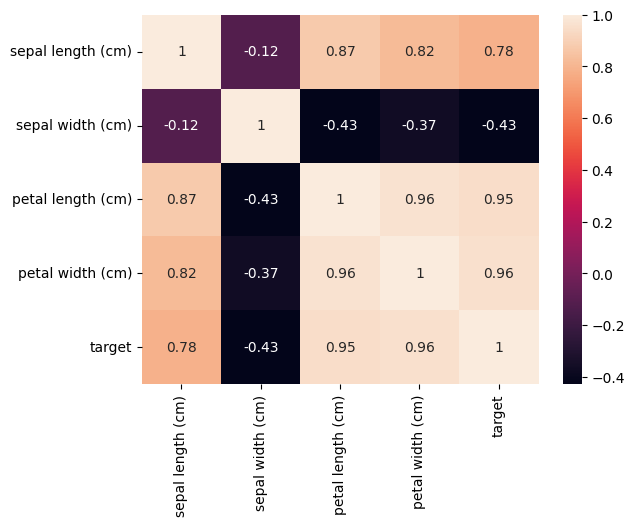

In [126]:
sns.heatmap(df.corr(), annot=True)

### Data Split

### Preparando os dados e treinando um modelo

Vamos separar os dados em treino e teste.

In [128]:
seed = 12

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=seed)

'''
PREENCHA AQUI:
    - Utilize a função train_test_split para separar os dados em dados
    de treino e de validação (80% treino e 20% validação)
'''

'\nPREENCHA AQUI:\n    - Utilize a função train_test_split para separar os dados em dados\n    de treino e de validação (80% treino e 20% validação)\n'

In [ ]:
# @title Resposta

# seed=12
# X_train, X_test, y_train, y_test = train_test_split(
#     df[iris['feature_names']], df['target'], test_size=0.2,
#     random_state = seed
# )

In [194]:
from itertools import combinations

model1 = LogisticRegression()

result_arr=[]
comb_arr=[]

print(len(X.columns))
for i in range(1, len(X.columns) + 1): 
    
    for comb in combinations(X.columns, i):
        
        newDFX = X_train[list(comb)]
        newDFX_test = X_test[list(comb)]

         
        model1.fit(newDFX,Y_train)
        result = model1.score(newDFX_test,Y_test)
        result_arr.append(result)
        comb_arr.append(comb)
        
        #print(comb)
        #print(result)
        



maxR2 = max(result_arr)

if maxR2 in result_arr:
   index = result_arr.index(maxR2)
   print(index)
   print(f"max R2: {maxR2}  , retrived from the array: {result_arr[index]}, the combination of features that made this: {comb_arr[index]}")



'''
PREENCHA AQUI:
    - Faça todas as combinações de features possíveis e avalie o desempenho
    de um modelo de Regressão Logística para cada uma dessas combinações.
'''

4
3
max R2: 0.9666666666666667  , retrived from the array: 0.9666666666666667, the combination of features that made this: ('petal width (cm)',)


c:\Users\Caue Paiva\Desktop\DATA_REPO\data_env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'\nPREENCHA AQUI:\n    - Faça todas as combinações de features possíveis e avalie o desempenho\n    de um modelo de Regressão Logística para cada uma dessas combinações.\n'

In [ ]:
# @title Resposta

# for f1, f2 in combinations(iris['feature_names'], 2):
#     print(f1, f2)
#     clf = LogisticRegression()
#     clf.fit(X_train[[f1,f2]], y_train)

#     print(f'\tScore: {clf.score(X_test[[f1,f2]],y_test)}')

### Escolhendo as melhores features

Agora que avaliamos todas os possíveis pares de features, escolha o par com o melhor score no teste.

In [ ]:
'''
PREENCHA AQUI
    - Faça o fitting do modelo nos dados de treino usando essas features
    - Verifique o score final nos dados de teste
'''

'\nPREENCHA AQUI\n    - Faça o fitting do modelo nos dados de treino usando essas features\n    - Verifique o score final nos dados de teste\n'

In [ ]:
# @title Reposta

# features = ['petal length (cm)', 'petal width (cm)']
# X_train = X_train[features]
# X_test = X_test[features]

# clf = LogisticRegression()
# clf.fit(X_train,y_train)
# clf.score(X_test,y_test)

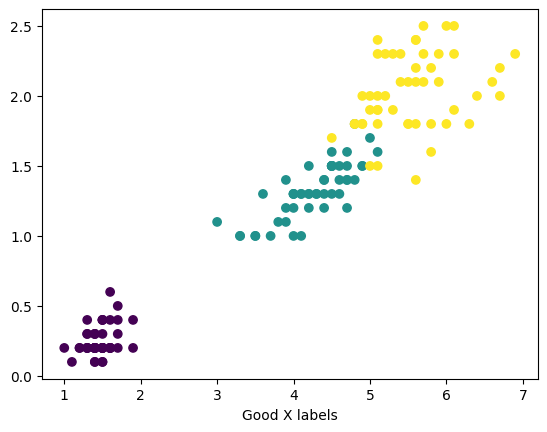

'\n    Faça um scatter plot dos dados de treino usando as duas features\n'

In [185]:
plotX = X[['petal length (cm)','petal width (cm)']]

plt.scatter(plotX['petal length (cm)'], plotX['petal width (cm)'], c=Y)


plt.xlabel("Good X labels")


plt.show()


'''
    Faça um scatter plot dos dados de treino usando as duas features
'''

In [ ]:
# @title Resposta

# plt.figure(figsize=(12,8))
# scatter = plt.scatter(X_train[features[0]], X_train[features[1]], c=y_train)
# leg = scatter.legend_elements()
# leg[0][0].set_label(iris['target_names'][0])
# leg[0][1].set_label(iris['target_names'][1])
# leg[0][2].set_label(iris['target_names'][2])

# plt.legend(handles=leg[0])
# plt.xlabel(features[0])
# plt.ylabel(features[1])
# plt.show()

### Decision Boundary

Agora, plote os dados com a região de decisão. Dessa vez, vamos plotar todos os dados, juntamente com as retas de separação. Basta remover o comentário da célula abaixo.

C:\Users\Caue Paiva\AppData\Local\Temp\ipykernel_11876\2578445189.py:8: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plotY = Y.to_numpy().astype(np.integer)
c:\Users\Caue Paiva\Desktop\DATA_REPO\data_env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


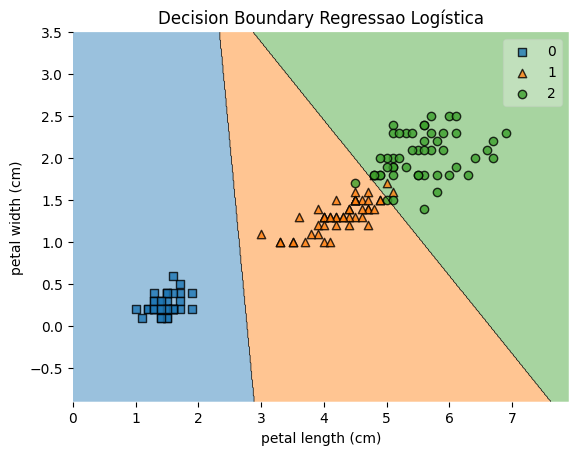

In [190]:
clf = LogisticRegression()

clf.fit(X_train[['petal length (cm)', 'petal width (cm)']],Y_train)
clf.score(X_test[['petal length (cm)', 'petal width (cm)']],Y_test)


plotX = X[['petal length (cm)', 'petal width (cm)']].to_numpy()
plotY = Y.to_numpy().astype(np.integer)

plot_decision_regions(plotX, plotY, clf=clf)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.title('Decision Boundary Regressao Logística')
plt.show()

# Bibliografia

- Christoph Molnar (2022)
Interpretable Machine Learning
Seções 5.1.1 a 5.1.3, 5.1.8, 5.1.9 e 5.2

- Trevor Hastie, Robert Tibshirani, Gareth James, Daniela Witten (2021)
An Introduction to Statistical Learning with Applications in R
Seções 3.1 e 4.3

- Daniel Jurafsky, James H. Martin (2019)
Speech and Language Processing
Capitulo 5 - “Logistic Regression”

- Jared Wilber (2022)
A Visual Introduction to Linear Regression